In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')
data

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [4]:
data.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [5]:
data.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [7]:
df=data.drop(['rank','discipline','yrs.since.phd','sex'], axis=1)
df

,yrs.service,salary
0,18,139750
1,16,173200
2,3,79750
3,39,115000
4,41,141500
...,...,...
392,30,103106
393,19,150564
394,25,101738
395,15,95329


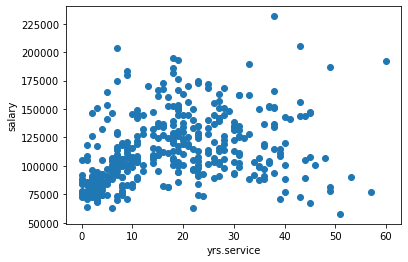

In [8]:
#visualize data
plt.scatter( data['yrs.service'] ,data['salary'])
plt.xlabel('yrs.service')
plt.ylabel('salary')
plt.show()

In [9]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values

In [10]:
X

array([[18],
       [16],
       [ 3],
       [39],
       [41],
       [ 6],
       [23],
       [45],
       [20],
       [18],
       [ 8],
       [ 2],
       [ 1],
       [ 0],
       [18],
       [ 3],
       [20],
       [34],
       [23],
       [36],
       [26],
       [31],
       [30],
       [19],
       [ 8],
       [ 8],
       [23],
       [ 3],
       [ 0],
       [ 8],
       [ 4],
       [ 2],
       [ 9],
       [ 2],
       [ 2],
       [ 0],
       [21],
       [ 4],
       [31],
       [ 9],
       [ 2],
       [23],
       [27],
       [38],
       [19],
       [15],
       [28],
       [19],
       [25],
       [ 1],
       [28],
       [11],
       [ 3],
       [ 9],
       [11],
       [ 5],
       [21],
       [ 8],
       [ 9],
       [ 3],
       [ 8],
       [ 2],
       [31],
       [11],
       [ 3],
       [ 8],
       [12],
       [31],
       [17],
       [36],
       [ 2],
       [45],
       [19],
       [34],
       [23],
       [ 3],
       [ 3],

In [11]:
Y

array([139750, 173200,  79750, 115000, 141500,  97000, 175000, 147765,
       119250, 129000, 119800,  79800,  77700,  78000, 104800, 117150,
       101000, 103450, 124750, 137000,  89565, 102580,  93904, 113068,
        74830, 106294, 134885,  82379,  77000, 118223, 132261,  79916,
       117256,  80225,  80225,  77000, 155750,  86373, 125196, 100938,
       146500,  93418, 101299, 231545,  94384, 114778,  98193, 151768,
       140096,  70768, 126621, 108875,  74692, 106639, 103760,  83900,
       117704,  90215, 100135,  75044,  90304,  75243, 109785, 103613,
        68404, 100522, 101000,  99418, 111512,  91412, 126320, 146856,
       100131,  92391, 113398,  73266, 150480, 193000,  86100,  84240,
       150743, 135585, 144640,  88825, 122960, 132825, 152708,  88400,
       172272, 107008,  97032, 105128, 105631, 166024, 123683,  84000,
        95611, 129676, 102235, 106689, 133217, 126933, 153303, 127512,
        83850, 113543,  82099,  82600,  81500, 131205, 112429,  82100,
      

In [12]:
X = df.drop('salary',axis=1)

In [13]:
X

,yrs.service
0,18
1,16
2,3
3,39
4,41
...,...
392,30
393,19
394,25
395,15


In [14]:
y = df['salary']
y.head()

0    139750
1    173200
2     79750
3    115000
4    141500
Name: salary, dtype: int64

In [15]:
x_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)

In [17]:
x_train

,yrs.service
6,23
1,16
295,36
320,23
358,14
...,...
323,15
192,18
117,36
47,19


In [18]:
X_test

,yrs.service
65,8
132,8
74,23
78,1
37,4
54,11
293,1
60,8
12,1
361,15


In [19]:
y_train

6      175000
1      173200
295     97150
320    104428
358    109954
        ...  
323    161101
192    122100
117    117515
47     151768
172     93164
Name: salary, Length: 357, dtype: int64

In [20]:
y_test

65     100522
132     77500
74     113398
78      86100
37      86373
54     103760
293    104800
60      90304
12      77700
361    109646
278    107100
311    108100
100    133217
59      75044
345    107986
173    134185
171    151575
332    105450
135    136000
255     83000
230     91000
308     74000
396     81035
76     150480
331    116518
284     88650
340    106231
368    131950
341    124312
134    168635
259     92550
319    135027
154     92000
219    119500
176     95436
170     91227
175    111751
357    107309
301    127100
90      97032
Name: salary, dtype: int64

In [21]:
model = LinearRegression()

In [22]:
model.fit(x_train, y_train)

LinearRegression()

In [33]:
y_pred=model.predict(X_test)

In [34]:
y_pred

array([106818.68161318, 106818.68161318, 118013.77923733, 101594.30272191,
       103833.32224674, 109057.70113801, 101594.30272191, 106818.68161318,
       101594.30272191, 112043.06050445, 114282.08002928, 107565.02145479,
       119506.45892055, 103086.98240513, 108311.3612964 , 115774.7597125 ,
       115028.41987089, 108311.3612964 , 114282.08002928, 106818.68161318,
       120999.13860377, 100847.9628803 , 103833.32224674, 103086.98240513,
       107565.02145479, 105326.00192996, 109057.70113801, 123238.15812861,
       113535.74018767, 119506.45892055, 123238.15812861, 112043.06050445,
       100847.9628803 , 109057.70113801, 106072.34177157, 104579.66208835,
       119506.45892055, 126969.85733666, 112789.40034606, 104579.66208835])

In [35]:
y_test

65     100522
132     77500
74     113398
78      86100
37      86373
54     103760
293    104800
60      90304
12      77700
361    109646
278    107100
311    108100
100    133217
59      75044
345    107986
173    134185
171    151575
332    105450
135    136000
255     83000
230     91000
308     74000
396     81035
76     150480
331    116518
284     88650
340    106231
368    131950
341    124312
134    168635
259     92550
319    135027
154     92000
219    119500
176     95436
170     91227
175    111751
357    107309
301    127100
90      97032
Name: salary, dtype: int64

In [29]:
f= X.shape[0] !=y.shape[0]
f

False

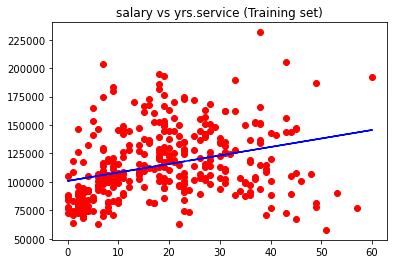

In [41]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train, model.predict(x_train),color='blue')
plt.title('salary vs yrs.service (Training set)')
plt.show()